In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

rawnakrawnak_rice_data_cse475_path = kagglehub.dataset_download('rawnakrawnak/rice-data-cse475')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install torchinfo

In [ ]:
import os

#Dataset path
base_dir = '/kaggle/input/rice-data-cse475/Original'
subdirs = sorted(os.listdir(base_dir))
print(f'Found {len(subdirs)} class-folders, e.g.:', subdirs[:5])

# Count files in each
for d in subdirs[:5]:
    n = len(os.listdir(os.path.join(base_dir, d)))
    print(f'  {d}: {n} files')

Found 1 class-folders, e.g.: ['Original']
  Original: 38 files


In [ ]:
import os

# Dataset path
base_dir = '/kaggle/input/rice-data-cse475/Original/Original'

# Get all class folders
classes = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])

# Loop through each class and count images
for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    image_count = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])
    print(f'📁 Class: {cls} — Total images: {image_count}')


📁 Class: BD30 — Total images: 500
📁 Class: BD33 — Total images: 500
📁 Class: BD39 — Total images: 500
📁 Class: BD49 — Total images: 500
📁 Class: BD51 — Total images: 500
📁 Class: BD52 — Total images: 500
📁 Class: BD56 — Total images: 500
📁 Class: BD57 — Total images: 500
📁 Class: BD70 — Total images: 500
📁 Class: BD72 — Total images: 500
📁 Class: BD75 — Total images: 500
📁 Class: BD76 — Total images: 500
📁 Class: BD79 — Total images: 500
📁 Class: BD85 — Total images: 500
📁 Class: BD87 — Total images: 500
📁 Class: BD91 — Total images: 500
📁 Class: BD93 — Total images: 500
📁 Class: BD95 — Total images: 500
📁 Class: BR22 — Total images: 500
📁 Class: BR23 — Total images: 500
📁 Class: BRRI102 — Total images: 500
📁 Class: BRRI67 — Total images: 500
📁 Class: BRRI74 — Total images: 500
📁 Class: Binadhan10 — Total images: 500
📁 Class: Binadhan11 — Total images: 500
📁 Class: Binadhan12 — Total images: 500
📁 Class: Binadhan14 — Total images: 500
📁 Class: Binadhan16 — Total images: 500
📁 Class: Bi

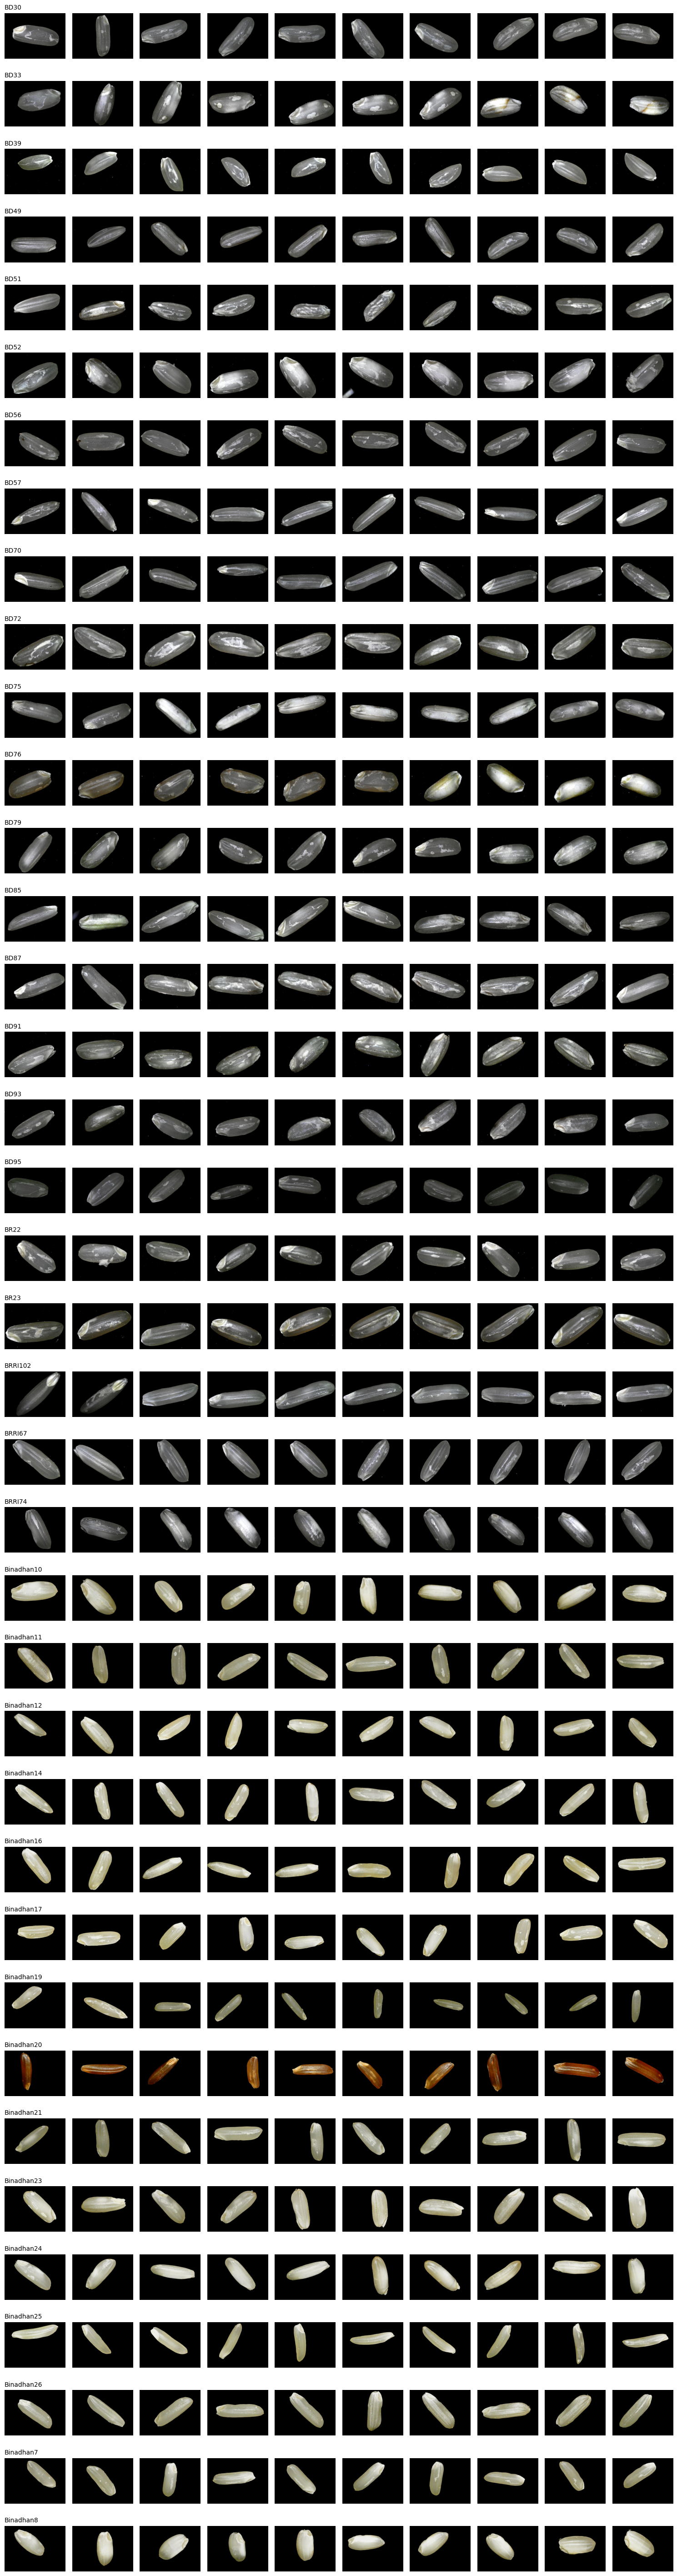

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Dataset path
base_dir = '/kaggle/input/rice-data-cse475/Original/Original'

# Get class folders (filter out any non-directories)
classes = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])

# Plot 10 images per class
n_cols = 10
n_rows = len(classes)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.5, n_rows * 1.5))

for row, cls in enumerate(classes):
    cls_path = os.path.join(base_dir, cls)
    # Get only image files
    image_files = sorted([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])[:n_cols]

    for col in range(n_cols):
        ax = axes[row, col] if n_rows > 1 else axes[col]  # Handle single-class case
        if col < len(image_files):
            img_path = os.path.join(cls_path, image_files[col])
            img = Image.open(img_path)
            ax.imshow(img)
        ax.axis('off')
        if col == 0:
            ax.set_title(cls, fontsize=10, loc='left')

plt.tight_layout()
plt.show()


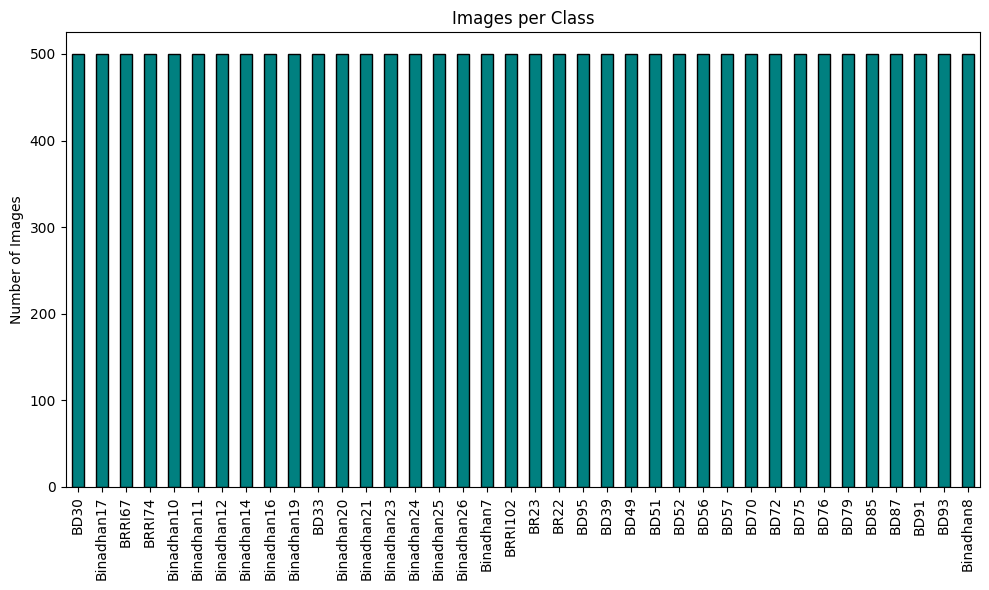

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Dataset path
base_dir = '/kaggle/input/rice-data-cse475/Original/Original'
classes = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])

# Count only image files
counts = {
    cls: len([f for f in os.listdir(os.path.join(base_dir, cls)) if os.path.isfile(os.path.join(base_dir, cls, f))])
    for cls in classes
}

# Create DataFrame and plot
df = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
df = df.sort_values('count', ascending=False)

plt.figure(figsize=(10, 6))
df['count'].plot.bar(color='teal', edgecolor='black')
plt.ylabel('Number of Images')
plt.title('Images per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


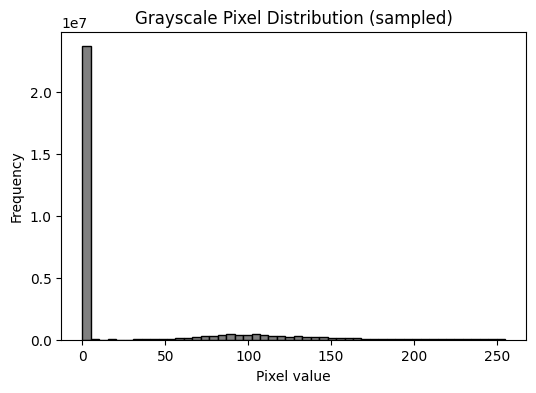

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

#Dataset path
base_dir = '/kaggle/input/rice-data-cse475/Original/Original'
classes = sorted(os.listdir(base_dir))

pix_vals = []

for cls in classes[:5]:  # Limit to first 5 classes
    cls_path = os.path.join(base_dir, cls)
    files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))][:20]

    for fn in files:
        img_path = os.path.join(cls_path, fn)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        arr = np.array(img)
        pix_vals.extend(arr.flatten())

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(pix_vals, bins=50, color='gray', edgecolor='black')
plt.title('Grayscale Pixel Distribution (sampled)')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Dataset path
base_dir = '/kaggle/input/rice-data-cse475/Original/Original'
classes = sorted(os.listdir(base_dir))

pix_vals = []

# Limit to first 20 classes
for cls in classes[:20]:
    cls_path = os.path.join(base_dir, cls)
    # Take first 20 image files per class
    files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))][:20]

    for fn in files:
        img_path = os.path.join(cls_path, fn)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        arr = np.array(img)
        pix_vals.extend(arr.flatten())

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(pix_vals, bins=50, color='gray', edgecolor='black')
plt.title('Grayscale Pixel Distribution (sampled from first 20 classes)')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset path
base_dir = '/kaggle/input/rice-data-cse475/Original/Original'
classes = sorted(os.listdir(base_dir))

pix_vals = []

# Sample first 20 classes, 20 images each
for cls in classes[:20]:
    cls_path = os.path.join(base_dir, cls)
    files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))][:20]

    for fn in files:
        img_path = os.path.join(cls_path, fn)
        img = Image.open(img_path).convert('L')  # Grayscale
        arr = np.array(img)
        pix_vals.extend(arr.flatten())

# Plot histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(pix_vals, bins=50, color='gray', edgecolor='black')
plt.title('Grayscale Pixel Histogram')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

# Plot smooth KDE curve using seaborn
plt.subplot(1, 2, 2)
sns.kdeplot(pix_vals, color='blue', fill=True)
plt.title('Grayscale Pixel Density Curve')
plt.xlabel('Pixel value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Dataset path
base_dir = '/kaggle/input/rice-data-cse475/Original/Original'

# Get all class folders
classes = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])

pix_vals = []

# Loop through ALL classes, read up to 20 grayscale images per class
for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))][:20]

    for fn in files:
        img_path = os.path.join(cls_path, fn)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        arr = np.array(img)
        pix_vals.extend(arr.flatten())

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(pix_vals, bins=50, color='slategray', edgecolor='black')
plt.title('Grayscale Pixel Distribution (Sampled from All Classes)')
plt.xlabel('Pixel Intensity (0–255)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd

base_dir = '/kaggle/input/rice-data-cse475/Original/Original'

classes = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])

file_paths = []
labels = []

for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
    for f in files:
        file_paths.append(os.path.join(cls_path, f))
        labels.append(cls)

df = pd.DataFrame({
    'file_path': file_paths,
    'label': labels
})


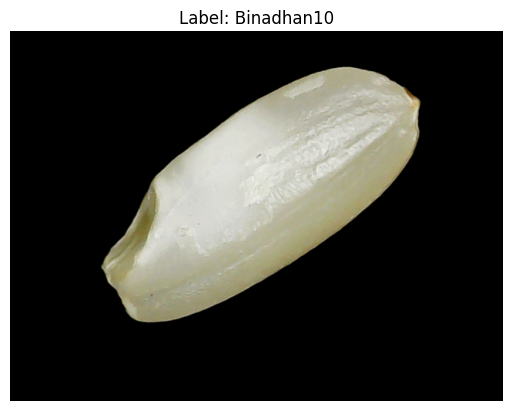

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt

random_index = random.randint(0, len(df) - 1)
random_row = df.iloc[random_index]

file_path = random_row['file_path']
label = random_row['label']

image = Image.open(file_path)
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()
